In [1]:
#!/usr/bin/env python3
import os
import glob
import numpy as np
import pandas as pd
import Bio
from Bio.Seq import MutableSeq
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqUtils import GC
import fnmatch
import matplotlib.pyplot as plt


In [2]:
os.chdir('/home/dave/Documents/Bacteria/libs')
import primer #From DaveBio
import Bacterial #From DaveBio

In [3]:
F8 = 'AGAGTTTGATCCTGGCTCAG'
F27 = 'AGAGTTTGATCMTGGCTCAG'
CC_F = 'CCAGACTCCTACGGGAGGCAGC'
F357F = 'CTCCTACGGGAGGCAGCAG'
F515F = 'GTGCCAGCMGCCGCGGTAA'
F533F = 'GTGCCAGCAGCCGCGGTAA'
F16S = 'CAACGAGCGCAACCCT'
F1237F = 'GGGCTACACACGYGCWAC'
V1F = 'GYGGCGNACGGGTGAGTAA'

R519 = 'GWATTACCGCGGCKGCTG'
CDR = 'CTTGTGCGGGCCCCCGTCAATTC'
R907 = 'CCGTCAATTCMTTTRAGTTT'
R1100 = 'AGGGTTGCGCTCGTTG'
R1391 = 'GACGGGCGGTGTGTRCA'
R1492 = 'GGTTACCTTGTTACGACTT'
R1492 = 'ACCTTGTTACGACTT'
V6R = 'AGCTGACGACANCCATGCA'

In [4]:
capillary_set_forward = [CC_F, F357F, F515F, V1F]
capillary_set_reverse = [R519, R907, R1100, R1492]      
forward_primer = MutableSeq(V1F)
reverse_primer = MutableSeq(V6R)
forward_degen = (forward_primer.count('Y'), forward_primer.count('N'))
reverse_degen = (reverse_primer.count('Y'), reverse_primer.count('N'))
data = Bacterial.get_species()
columns = ['Species', 'Record id', '16S Sequence', 'Length of Sequence']
core_data = pd.DataFrame(data, columns=columns)

In [5]:
fwd_tup = primer.degenerate2(forward_primer)
rev_tup = primer.degenerate2(reverse_primer)
calculated_data = primer.PCR_amplify(core_data, rev_tup, fwd_tup)
calculated_data.to_csv('Bacterial_Amplicons.csv', sep='\t')
calculated_data

,Species,Forward Primer,forward_primer_position,Reverse Primer,reverse_primer_position,GC Content,Length of Amplicon,Amplicon
0,Micrococcus.luteus,GTGGCGAACGGGTGAGTAA,75,TGCATGGTTGTCGTCAGCT,390,57.3,953,GTGGCGAACGGGTGAGTAACACGTGAGTAACCTGCCCTTAACTCTG...
1,Streptococcus.pyogenes,N/a,N/a,TGCATGGTTGTCGTCAGCT,361,0.0,0,
2,Streptococcus.pneumoniae,N/a,N/a,TGCATGGTTGTCGTCAGCT,450,0.0,0,
3,Streptococcus.agalactiae,N/a,N/a,TGCATGGTTGTCGTCAGCT,451,0.0,0,
4,Haemophilus.influenzae,GTGGCGGACGGGTGAGTAA,100,TGCATGGCTGTCGTCAGCT,419,52.5,967,GTGGCGGACGGGTGAGTAATGCTTGGGAATCTGGCTTATGGAGGGG...
5,Moraxella.osloensis,GTGGCGGACGGGTGAGTAA,91,TGCATGGCTGTCGTCAGCT,467,51.1,964,GTGGCGGACGGGTGAGTAACATTTAGGAATCTACCTAGTAGTGGGG...
6,Serratia.marcescens,GCGGCGGACGGGTGAGTAA,95,TGCATGGCTGTCGTCAGCT,468,54.9,969,GCGGCGGACGGGTGAGTAATGTCTGGGAAACTGCCTGATGGAGGGG...
7,Flavonifractor.plautii,GTGGCGGACGGGTGAGTAA,92,TGCATGGTTGTCGTCAGCT,504,55.0,954,GTGGCGGACGGGTGAGTAACGCGTGAGGAACCTGCCTTGGAGAGGG...
8,Agrobacterium.tumefaciens,N/a,N/a,TGCATGGCTGTCGTCAGCT,476,0.0,0,
9,Escherichia.coli,GTGGCGGACGGGTGAGTAA,92,TGCATGGCTGTCGTCAGCT,390,54.9,968,GTGGCGGACGGGTGAGTAATGTCTGGGAAACTGCCTGATGGAGGGG...


In [8]:
a, b = Bacterial.compare_fragments(calculated_data.loc[(core_data['Species'] == 'Staphylococcus.epidermidis')]['Amplicon'].item(), calculated_data.loc[(core_data['Species'] == 'Staphylococcus.pettenkoferi')]['Amplicon'].item(), 'G')

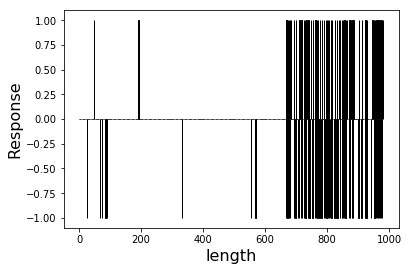

In [9]:
pos = range(0,len(a))
c = np.array(a)-np.array(b)
plt.bar(pos,c,color='pink',edgecolor='black')
plt.xlabel('length', fontsize=16)
plt.ylabel('Response', fontsize=16)
plt.show()

In [6]:
Bacterial.compare_letters(calculated_data.loc[(core_data['Species'] == 'Klebsiella.pneumoniae')]['Amplicon'].item(), calculated_data.loc[(core_data['Species'] == 'Enterococcus.faecalis')]['Amplicon'].item(), 0)

G[T/C]GGCGGACGGGTGAGTAA[C/T][A/G][C/T][G/C]TGGG[T/A]AAC[C/T][T/G][A/C]C[C/T][C/G]AT[C/G][A/G][G/A][A/G]GGGG[G/A][A/T][T/A]A[A/C][C/T]ACT[T/G]G[G/A]AA[A/C][C/G][A/G][G/T][G/A][T/G][G/C][C/T][T/A]A[A/T][T/A][A/C]C[C/G][G/C][C/A][A/T][T/A]A[A/C][C/G][A/T][G/C][T/G][T/C][T/A]A[T/G][G/A]CC[G/A][C/A]A[T/G][G/T]G[C/G][A/G][T/G][A/G]A[G/C][A/C][G/T]T[G/C][A/G][A/G][A/G][G/C][G/C][C/T][G/C][C/A]T[T/G][T/C]C[G/A][G/T][G/C][T/A]G[T/A][C/T]G[C/T][T/G][G/C][A/C][T/C][G/A]GATGG[A/G][C/A][C/T][C/T][G/A][C/G][G/C][G/T][T/A]G[C/T]A[T/G][T/G][A/T]G[C/G][T/G][A/G][G/T][T/A][T/A][G/C]G[T/G][G/C][A/T][G/C][G/A][T/C][A/C][A/T][C/A]GGC[T/G][C/A][A/C][C/G][C/A][A/T][A/C][G/C][G/C][C/T][C/A][A/G]C[G/T][A/G][T/G][G/T]C[A/T][T/G]AG[C/A][C/G]GA[C/T][C/G][T/A][G/C][A/C][G/A][A/G][G/C][G/C][G/A][T/C][G/A][A/C]T[C/G]G[G/A][C/A]C[A/T][C/G]A[C/G][T/A][G/C][G/A][G/C][A/G][C/G]T[G/C][A/C][G/A][A/G][C/A][A/C][C/T][G/C][G/C][C/T][C/A]C[A/G]G[A/G][C/A][T/G][C/G][T/C]A[C/G][G/C][G/A]G[A/T]GG[C/G][A/G][G/A][C/A][A/T][G/A]T[A